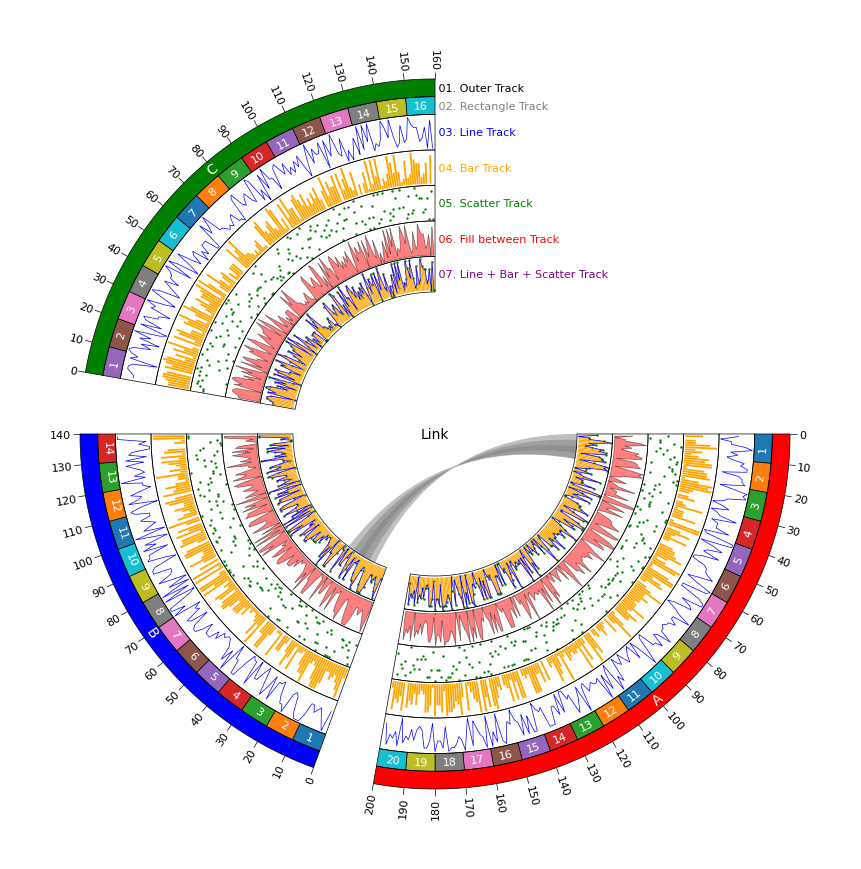

In [3]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import numpy as np

np.random.seed(0)
ColorCycler.set_cmap("tab10")

sectors = {"A": 200, "B": 140, "C": 160}
sector_colors = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=10, start=90, end=360, endspace=False)

for sector in circos.sectors:
    # Outer Track
    outer_track = sector.add_track((95, 100))
    outer_track.text(sector.name, color="white")
    outer_track.axis(fc=sector_colors[sector.name])
    outer_track.xticks_by_interval(interval=10, label_orientation="vertical")
    # Rectangle Track
    rect_track = sector.add_track((90, 95))
    rect_size = 10
    for i in range(int(rect_track.size / rect_size)):
        x1, x2 = i * rect_size, i * rect_size + rect_size
        rect_track.rect(x1, x2, ec="black", lw=0.5, color=ColorCycler())
        rect_track.text(str(i + 1), (x1 + x2) / 2, size=8, color="white")
    # Generate random x, y plot data
    x = np.arange(1, int(sector.size))
    y = np.random.randint(0, 10, len(x))
    # Line Track
    line_track = sector.add_track((80, 90), r_pad_ratio=0.1)
    line_track.axis()
    line_track.line(x, y, color="blue")
    # Bar Track
    scatter_track = sector.add_track((70, 80), r_pad_ratio=0.1)
    scatter_track.axis()
    scatter_track.bar(x, y, width=0.8, color="orange")
    # Scatter Track
    bar_track = sector.add_track((60, 70), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.scatter(x, y, color="green", s=3)
    # Fill Track
    fill_track = sector.add_track((50, 60), r_pad_ratio=0.1)
    fill_track.axis()
    fill_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    # Line + Bar + Scatter Track
    line_bar_scatter_track = sector.add_track((40, 50), r_pad_ratio=0.1)
    line_bar_scatter_track.axis()
    line_bar_scatter_track.line(x, y, color="blue")
    line_bar_scatter_track.scatter(x, y, color="green", s=3)
    line_bar_scatter_track.bar(x, y, width=0.8, color="orange")

# Plot link
circos.link(("A", 0, 15), ("B", 10, 25))
circos.link(("A", 5, 20), ("B", 15, 30))
circos.link(("A", 10, 20), ("B", 20, 35))
# circos.link(("A", 30, 60), ("C", 30, 60), ec="black", lw=0.5)
# circos.link(("A", 100, 115), ("A", 165, 150), hatch="//", ec="black")
# circos.link(("B", 90, 110), ("C", 110, 90), hatch="+", ec="green", lw=1, ls="dotted")
# circos.link(("B", 120, 140), ("C", 140, 160), ec="blue", lw=1, ls="dashed")
# circos.link(("B", 60, 70), ("A", 200, 190), direction=1, color="red")
# circos.link(("A", 15, 30), ("C", 135, 120), direction=2, color="purple")

# Plot text description
text_common_kws = dict(ha="left", va="center", size=8)
circos.text(" 01. Outer Track", r=97.5, color="black", **text_common_kws)
circos.text(" 02. Rectangle Track", r=92.5, color="grey", **text_common_kws)
circos.text(" 03. Line Track", r=85, color="blue", **text_common_kws)
circos.text(" 04. Bar Track", r=75, color="orange", **text_common_kws)
circos.text(" 05. Scatter Track", r=65, color="green", **text_common_kws)
circos.text(" 06. Fill between Track", r=55, color="red", **text_common_kws)
circos.text(" 07. Line + Bar + Scatter Track", r=45, color="purple", **text_common_kws)
circos.text("Link", r=0, ha="center", va="center", color="black")

fig = circos.plotfig()

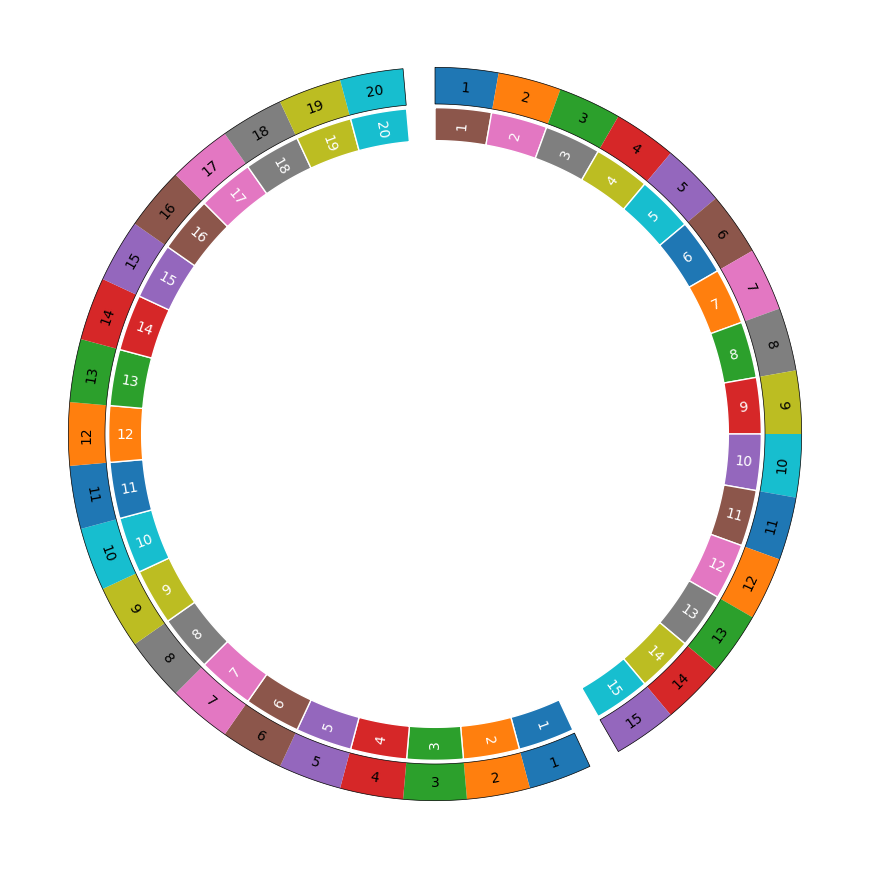

In [2]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
ColorCycler.set_cmap("tab10")

sectors = {"Guideline Item": 15, "Critirian": 20}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track1 = sector.add_track((90, 100))
    track1.axis()
    # Plot rect & text (style1)
    for i in range(int(track1.size)):
        start, end = i, i + 1
        track1.rect(start, end, fc=ColorCycler())
        track1.text(str(end), (end + start) / 2)
    # Plot rect & text (style2)
    track2 = sector.add_track((80, 89))
    for i in range(int(track2.size)):
        start, end = i, i + 1
        track2.rect(start, end, fc=ColorCycler(), ec="white", lw=1)
        track2.text(str(end), (end + start) / 2, color="white", orientation="vertical")

fig = circos.plotfig()